# Fitting a straight line to data points

_Note: this document uses the programming language Python to generate data and plot graphs. You can just skip the "code cells" if you don't know Python. Python is taught in PHYS3112._

A very common task in physics experiments is to fit a straight line to data points. We may need to know the slope of the line, the intercept with the y-axis, and the uncertainties on both these numbers. In general, the data points themselves will have uncertainties in both their x and y values.

To start with, let's assume that the data only have errors in y. We will use Python to generate some fake data, with x taking integer values from 0 to 9, and y being a linear function of x, with some Gaussian noise added.

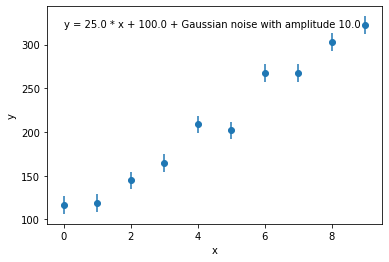

In [16]:
# Import the library functions that we will need.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

slope = 25
intercept = 100
yerr = 10 # The amplitude of the Gaussian noise.

# Seed the random number generator, so that we
# get the same numbers each time we run this program.

np.random.seed(1)

# Here is an array of x values: the integers from 0 to 9:

x = np.array(np.arange(10))

# Generate some fake y data with Gaussian 
# noise (amplitude "yerr") added.

y = slope * x + intercept + \
    np.random.normal(loc=0.0, scale=yerr, size=x.size)

# Plot the data.

plt.errorbar(x, y, yerr = yerr, fmt = 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)
plt.text(0, 320, \
         'y = {:.1f} * x + {:.1f} + Gaussian noise with amplitude {:.1f}' \
         .format(slope, intercept, yerr))
plt.show()


The plot above shows our fake data. You can see that it appears to roughly follow a straight line relationship between $x$ and $y$. The error bars in $y$ are $\pm1\sigma$, and come from the Gaussian noise we added. We are assuming no error in $x$.

For our first attempt at finding the parameters of the best-fitting straight line, we can attempt to guess the $y$ intercept by eye by drawing a bunch of parallel lines that roughly fit the data points, as follows:

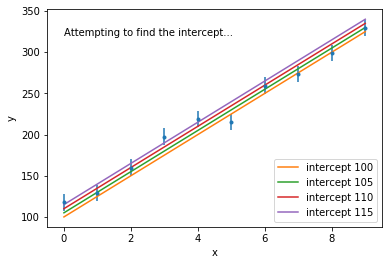

In [5]:
# Plot the data, and some parallel lines.

plt.errorbar(x, y, yerr = yerr, fmt = '.')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)
plt.plot(x, 25 * x + 100, label = 'intercept 100')
plt.plot(x, 25 * x + 105, label = 'intercept 105')
plt.plot(x, 25 * x + 110, label = 'intercept 110')
plt.plot(x, 25 * x + 115, label = 'intercept 115')
plt.legend(loc = 'lower right')
plt.text(0, 320, 'Attempting to find the intercept...')
plt.show()

By inspection of the above plot, the best fit has an intercept of about 110, and the uncertainty is about 5. Now that we have the intercept, let's find the slope by trying a number of lines with different slopes, as follows:

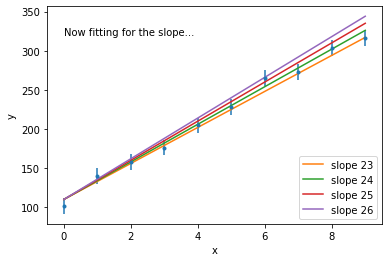

In [10]:
# Plot the data, and some lines with different slopes.

plt.errorbar(x, y, yerr = yerr, fmt = '.')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)

plt.plot(x, 23*x + 110, label = 'slope 23')
plt.plot(x, 24*x + 110, label = 'slope 24')
plt.plot(x, 25*x + 110, label = 'slope 25')
plt.plot(x, 26*x + 110, label = 'slope 26')
plt.legend(loc = 'lower right')
plt.text(0, 320, 'Now fitting for the slope...')
plt.show()

By inspection of the plot above, the best fitting slope is about 24 with an uncertainty of about 1. Leading to a final result for the straight line fit of 

$$y = (24\pm1)x +(110\pm5)$$

which we plot below.

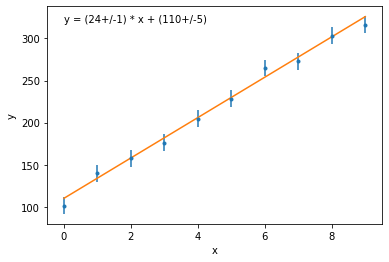

In [11]:
plt.errorbar(x, y, yerr = yerr, fmt = '.')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)
plt.text(0, 320, "y = (24+/-1) * x + (110+/-5)")
plt.plot(x, 24*x + 110)
plt.show()

Note that the individual data points fit the line reasonably well, with most of them within their 1 sigma error bars. So, we can say that the data are well represented by a linear relationship.

The following plots show variations that you may encounter. In each case, there is either something wrong with the error calculations, or with the linear assumption. If this happens to you in the lab, you should investigate further to find the source of the problem. Note that having large error bars is not necessarily a problem, it could result from the errors being a combination of systematic and random errors.

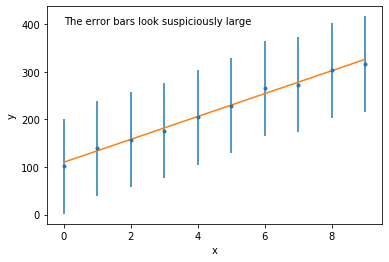

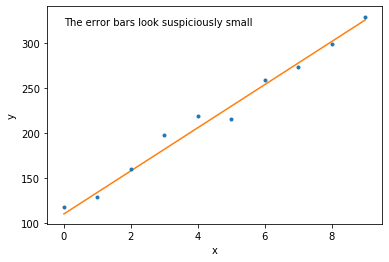

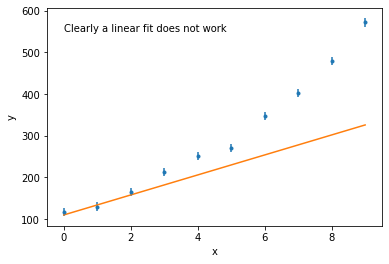

In [12]:
plt.errorbar(x, y, yerr = 10 * yerr, fmt = '.')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)
plt.plot(x, 24 * x + 110)
plt.text(0, 400, 'The error bars look suspiciously large')
plt.show()

np.random.seed(0)
plt.errorbar(x, 25 * x + 100 + \
    np.random.normal(loc=0.0, scale=yerr, size=x.size), yerr = 0.1*yerr, fmt = '.')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)
plt.text(0, 320, 'The error bars look suspiciously small')
plt.plot(x, 24 * x + 110)
plt.show()

np.random.seed(0)
plt.errorbar(x, 25 * x + x**2.5 + 100 + \
    np.random.normal(loc=0.0, scale=yerr, size=x.size), yerr = yerr, fmt = '.')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)
plt.text(0, 550, 'Clearly a linear fit does not work')
plt.plot(x, 24 * x + 110)
plt.show()



## Removing the guesswork

You may think that the fairly crude way in which we guessed the slope and intercept, and their errors, is unsatisfactory. However, for the sort of data that we used, this approach is quite OK for the higher-year laboratory. You might be tempted to use a more "mathematical" approach by, e.g., calculating slopes using pairs of data points, and then averaging the slopes and using their standard deviation as the uncertainty. However, you will almost certainly be led astray by such ad-hoc methods.

The right approach is to use a proper curve fitting program, which is actually very easy. It only takes a few lines of code, as shown below (note that most of this code example is comments, or plotting the results; the actual curve fitting to the data is just a few lines).

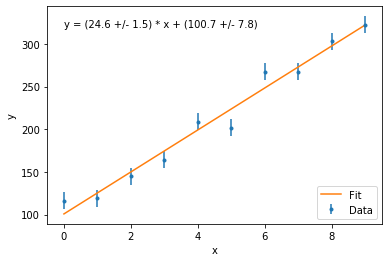

In [17]:
# Import the optimization code from scipy.

from scipy import optimize, stats

# Define a function that we will fit to the data. The function
# takes an array of values, x, at which to calculate its values, 
# and the parameters m (the slope), and c (the y intercept), that 
# we wish to fit.

def func(x, m, c):
    return m * x + c

# Fitting the function to the data is now as simple as one line, where
# [20, 80] is an initial guess of the slope and intercept:

pars, pars_covariance = optimize.curve_fit(func, x, y, [20, 80])

# And the one-sigma variances in the parameters are:

oneSigmaVariances = np.sqrt(np.diag(pars_covariance))

# Finally, plot the data, the error bars, the fit, and the
# parameters of the straight line.

plt.errorbar(x, y, yerr = yerr, fmt = '.', label = 'Data')
plt.plot(x, func(x, pars[0], pars[1]), label='Fit')
plt.text(0, 320, "y = ({:.1f} +/- {:.1f}) * x + ({:.1f} +/- {:.1f})".format(
  pars[0], oneSigmaVariances[0],
  pars[1], oneSigmaVariances[1]))

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 9.5)
plt.legend(loc='lower right')
plt.show()


This fitted straight line appears to represent the data nicely, and the slope/intercept and their errors agree fairly well with our earlier guesses.

You might note, however, that the fitted value of the intercept $(115.0\pm5.5)$ is 2.7 sigma away from the true value of 100. The chance of being this far, or further, away is 0.7%. We were just unlucky with the random noise we added.

Python also has `numpy.polyfit` for fitting polynomials (set the order to 1 for a straight line), and `scipy.stats.linregress` for fitting straight lines. The latter does not give an error on the intercept. Both are faster than `scipy.optimize.curve_fit`, but `curve_fit` has the advantage that you can easily change the function to a non-polynomial one if you need to.

Michael Ashley 16 Jun 2019